<a href="https://colab.research.google.com/github/khangsheng1/PyTorch-Tutorial/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Data set from:
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import pandas as pd
data = "/content/sample_data/breast-cancer-detection-data.csv"
my_data = pd.read_csv(data)
my_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Check for NaN
my_data.isnull().values.any()

True

In [6]:
my_data.dropna(axis=1, how='all', inplace=True)
my_data.isnull().values.any()

False

In [7]:
my_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# drop labels and id
X = my_data.drop(columns=['diagnosis', 'id'])
y = my_data['diagnosis']
print(f' First 5 of Diagnosis \n{y.head()}\n')
print(f' First 5 of X')
X.head()

 First 5 of Diagnosis 
0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

 First 5 of X


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Data info
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
class Model(nn.Module):
  def __init__(self, input=30, h1 = 16, h2=16, output=2):
    super().__init__()
    self.fc1 = nn.Linear(input, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    x = F.softmax(x, dim=1)

    return x

In [11]:
# Pick a manual seed for randomization
torch.manual_seed(32)
model = Model()

In [12]:
# Split into train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test labels shape: {y_test.shape}')

Training set shape: (455, 30)
Test set shape: (114, 30)
Training labels shape: (455,)
Test labels shape: (114,)


In [13]:
# Convert X features to float tensors
X_train_tensor = torch.FloatTensor(X_train.values) # Access the underlying NumPy array using .values
X_test_tensor = torch.FloatTensor(X_test.values)   # Access the underlying NumPy array using .values

# Convert y labels to float tensors (assuming 'M' maps to 1 and 'B' maps to 0)
y_train_tensor = torch.LongTensor(y_train.map({'M': 1, 'B': 0}).values)
y_test_tensor = torch.LongTensor(y_test.map({'M': 1, 'B': 0}).values)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [15]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=30, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=2, bias=True)
)>


In [16]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 2000
losses = []

for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train_tensor) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train_tensor) # predicted value vs the y_train

  # Keep track of our losses
  losses.append(loss.item())

  # Print every 200 epochs
  if i % 200 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward
  # propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.9440308809280396
Epoch: 200 and loss: 0.6828597187995911
Epoch: 400 and loss: 0.6698296666145325
Epoch: 600 and loss: 0.6561979651451111
Epoch: 800 and loss: 0.44996437430381775
Epoch: 1000 and loss: 0.3893287181854248
Epoch: 1200 and loss: 0.3784259855747223
Epoch: 1400 and loss: 0.37443292140960693
Epoch: 1600 and loss: 0.37227368354797363
Epoch: 1800 and loss: 0.3706701397895813


Text(0.5, 1.0, 'Loss per epoch')

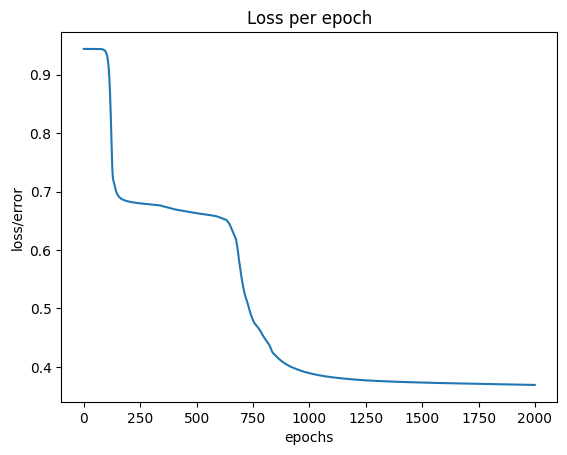

In [17]:
# Graph it out!
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")
plt.title("Loss per epoch")

In [18]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(X_test_tensor) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test_tensor) # Find the loss/error

In [19]:
# You want this loss number to match that of the testing data
loss

tensor(0.4104)

In [20]:
correct = 0
wrong = 0
total = 0
wrong_indicies = []
with torch.no_grad():
    for i in range(len(X_test_tensor)):

        # Add an extra dimension to X_test_tensor[i]
        y_val = model(X_test_tensor[i].unsqueeze(0))
        _, predicted = torch.max(y_val, 1) # Change dimension to 1 to match the new shape

        if y_test_tensor[i] == 0:
            x = 'B'
        else:
            x = 'M'

        if predicted == y_test_tensor[i]:
            correct += 1

        if predicted != y_test_tensor[i]:
            wrong += 1
            wrong_indicies.append(i)
        total += 1

        # print(f'{i+1}.) {str(y_val)} \t {y_test_tensor[i]} \t {x}')

print(f'We got {correct} out of {total} correct! {correct/total}%')
print(f'We got {wrong} out of {total} incorrect. {wrong/total}% :(')


We got 103 out of 114 correct! 0.9035087719298246%
We got 11 out of 114 incorrect. 0.09649122807017543% :(


In [21]:
print(wrong_indicies)

[10, 16, 20, 26, 48, 50, 73, 95, 102, 112, 113]


In [51]:
Test_Num = 45 # write indice of y_test you want to see the result of

with torch.no_grad():
  if y_test_tensor[Test_Num] == 0:
        x = 'Benign'
  else:
        x = 'Malignant'

  pred = model(X_test_tensor[Test_Num].unsqueeze(0))
  if pred.argmax() == 0:
        y = 'Benign'
  else:
        y = 'Malignant'

  # Add an extra dimension to X_test_tensor[10] to create a batch of size 1
  print(f'Testing set index #{Test_Num}:')
  print(f'Prediction probability: {pred} \t {y}')
  print(f'The true value is {x}, the predicted vlaue is {y}')

Testing set index #45:
Prediction probability: tensor([[0.8701, 0.1299]]) 	 Benign
The true value is Benign, the predicted vlaue is Benign


In [46]:
# Showing what the wrong predictions were
for i in range(len(wrong_indicies)):
  with torch.no_grad():
    if y_test_tensor[wrong_indicies[i]] == 0:
        x = 'Benign'
    else:
        x = 'Malignant'

    pred = model(X_test_tensor[wrong_indicies[i]].unsqueeze(0))
    if pred.argmax() == 0:
        y = 'Benign'
    else:
        y = 'Malignant'

    # Add an extra dimension to X_test_tensor[10] to create a batch of size 1
    print(f'Testing set index #{wrong_indicies[i]}:')
    print(f'Prediction probability: {pred} \t Prediction: {y} \t True Value: {x}\n')


Testing set index #10:
Prediction probability: tensor([[0.0483, 0.9517]]) 	 Prediction: Malignant 	 True Value: Benign

Testing set index #16:
Prediction probability: tensor([[0.0086, 0.9914]]) 	 Prediction: Malignant 	 True Value: Benign

Testing set index #20:
Prediction probability: tensor([[0.9942, 0.0058]]) 	 Prediction: Benign 	 True Value: Malignant

Testing set index #26:
Prediction probability: tensor([[0.9911, 0.0089]]) 	 Prediction: Benign 	 True Value: Malignant

Testing set index #48:
Prediction probability: tensor([[0.9962, 0.0038]]) 	 Prediction: Benign 	 True Value: Malignant

Testing set index #50:
Prediction probability: tensor([[0.1349, 0.8651]]) 	 Prediction: Malignant 	 True Value: Benign

Testing set index #73:
Prediction probability: tensor([[0.9221, 0.0779]]) 	 Prediction: Benign 	 True Value: Malignant

Testing set index #95:
Prediction probability: tensor([[0.4500, 0.5500]]) 	 Prediction: Malignant 	 True Value: Benign

Testing set index #102:
Prediction proba